##  🎯 **K-means** 🎯

---

### Introducción:
Realizaremos el entrenamiento de un modelo de clustering K-means utilizando un conjunto de datos integrado en scikit-learn Concretamente, utilizaremos la base de datos "wine" disponible a través de sklearn.datasets. Esta base de datos contiene información química sobre diferentes tipos de vino y es frecuentemente utilizada para análisis exploratorio y clustering.

---
### Objetivo

Predecir los diferentes tipos de vino (variedades de uva o cultivar) de  acuerdo a sus características.

`Clase 0`: Vino proveniente del primer cultivar.

`Clase 1`: Vino proveniente del segundo cultivar.

`Clase 2`: Vino proveniente del tercer cultivar.

---

### 1. Importación de librerías

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from sklearn.decomposition import PCA

---

### 2. Cargar datos

In [6]:
data = load_wine()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target  


---

### 3. Exploración de datos

In [ ]:
print("Dimensiones del conjunto de datos: ", X.shape)
X.head()

Dimensiones del conjunto de datos:  (178, 13)


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [8]:
# Estadísticos descriptivos
X.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


<Figure size 1000x600 with 0 Axes>

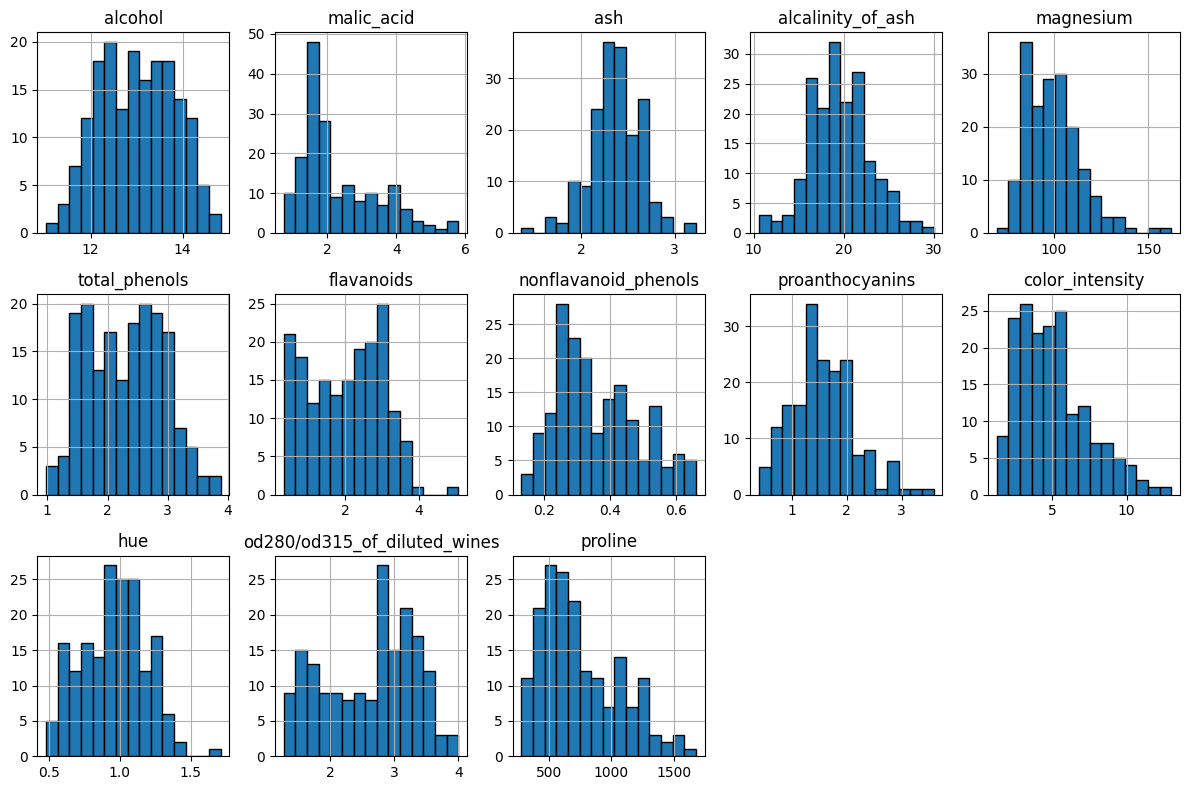

In [9]:
# Distribución de las características
plt.figure(figsize=(10,6))
X.hist(figsize=(12,8), bins=15, layout=(3,5), edgecolor='black')
plt.tight_layout()
plt.show()

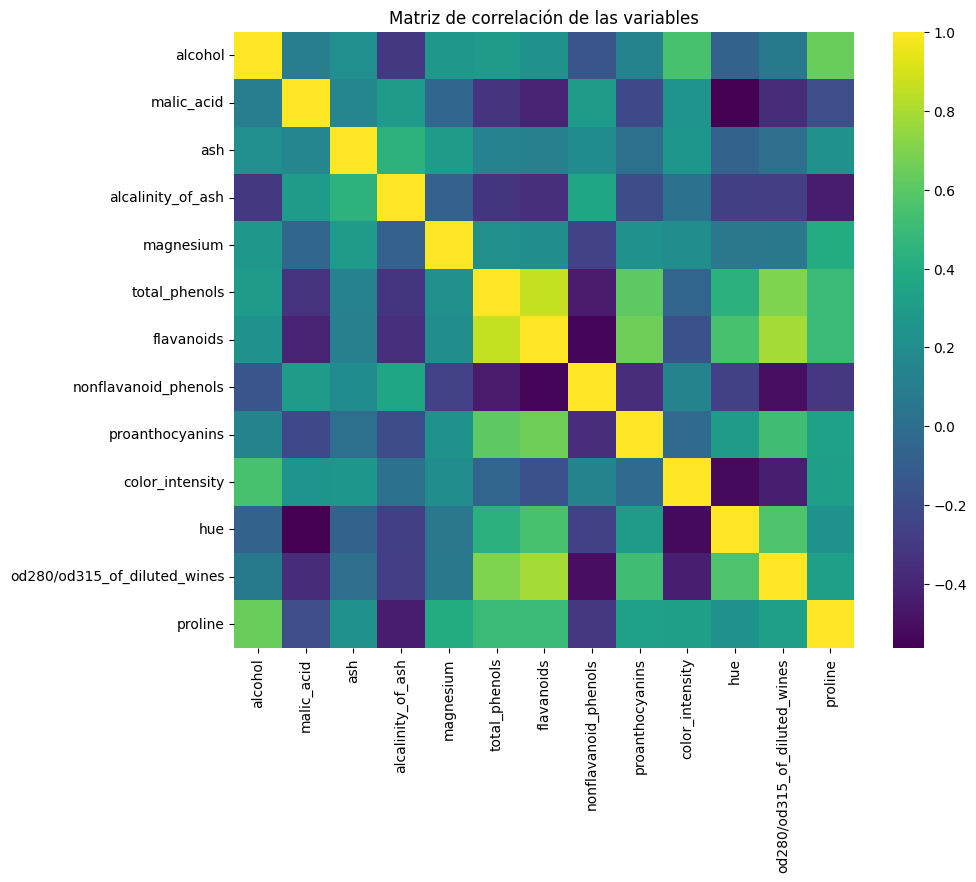

In [10]:
# Matriz de correlación para entender relaciones entre variables
plt.figure(figsize=(10,8))
sns.heatmap(X.corr(), annot=False, cmap='viridis')
plt.title("Matriz de correlación de las variables")
plt.show()

- Observaciones Iniciales

    -Los datos del vino tienen 13 características químicas.

    -Algunas características pueden estar en escalas muy distintas (por ejemplo, 'ash', 'magnesium', 'alcohol'), por lo que probablemente será útil escalar los datos.

    -Aunque el conjunto de datos contiene 3 tipos de vino (3 clases), no usaremos estas etiquetas para el entrenamiento ya que K-means es un algoritmo no supervisado. Sin embargo, podrían sernos útiles para evaluar indirectamente la calidad del clustering obtenido.

---

### 4. Procesamiento

In [13]:
# Escalado de características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

**Nota sobre el escalado**

El escalado es importante en K-means ya que este algoritmo se basa en distancias (normalmente Euclídeas). Si las variables tienen rangos muy diferentes, aquellas con varianza más alta dominan el proceso de clustering. Escalar las variables a una misma escala (media=0, varianza=1) evita este problema y da a todas las variables la misma importancia inicial.

---

### 5. Entrenamiento

#### 5.1 Selección del número de clústeres

**Método del codo (Elbow method):** 
Calculamos la suma de los cuadrados de las distancias intra-clúster (Inertia) para diferentes valores de k y vemos donde se produce un "codo".

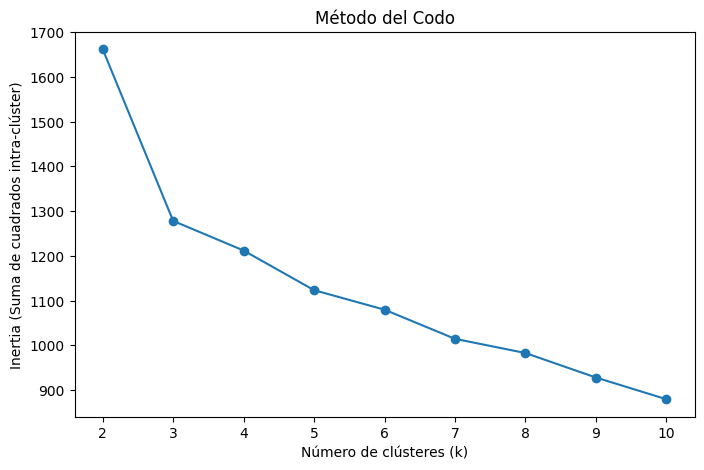

In [14]:
inertias = []
K_values = range(2, 11)
for k in K_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(K_values, inertias, marker='o')
plt.xticks(K_values)
plt.title("Método del Codo")
plt.xlabel("Número de clústeres (k)")
plt.ylabel("Inertia (Suma de cuadrados intra-clúster)")
plt.show()

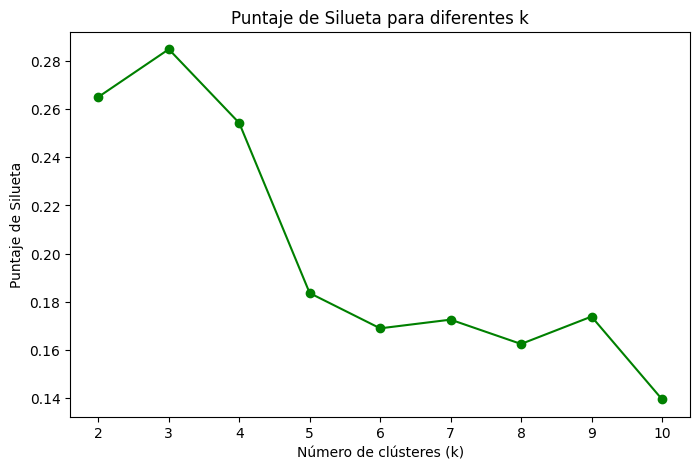

El número de clústeres con mejor silueta es: 3


In [15]:
# Métrica de Silueta para varios k
sil_scores = []
for k in K_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    labels = kmeans.labels_
    sil = silhouette_score(X_scaled, labels)
    sil_scores.append(sil)

plt.figure(figsize=(8,5))
plt.plot(K_values, sil_scores, marker='o', color='green')
plt.xticks(K_values)
plt.title("Puntaje de Silueta para diferentes k")
plt.xlabel("Número de clústeres (k)")
plt.ylabel("Puntaje de Silueta")
plt.show()

# Determinamos el k con mejor silueta
best_k = K_values[np.argmax(sil_scores)]
print("El número de clústeres con mejor silueta es:", best_k)

#### Entrenamiento

In [16]:
kmeans_final = KMeans(n_clusters=best_k, random_state=42)
kmeans_final.fit(X_scaled)
labels_final = kmeans_final.labels_

print("Centroides finales:")
print(kmeans_final.cluster_centers_)

Centroides finales:
[[-0.92607185 -0.39404154 -0.49451676  0.17060184 -0.49171185 -0.07598265
   0.02081257 -0.03353357  0.0582655  -0.90191402  0.46180361  0.27076419
  -0.75384618]
 [ 0.16490746  0.87154706  0.18689833  0.52436746 -0.07547277 -0.97933029
  -1.21524764  0.72606354 -0.77970639  0.94153874 -1.16478865 -1.29241163
  -0.40708796]
 [ 0.83523208 -0.30380968  0.36470604 -0.61019129  0.5775868   0.88523736
   0.97781956 -0.56208965  0.58028658  0.17106348  0.47398365  0.77924711
   1.12518529]]


---

### 7. Visualización de resultados

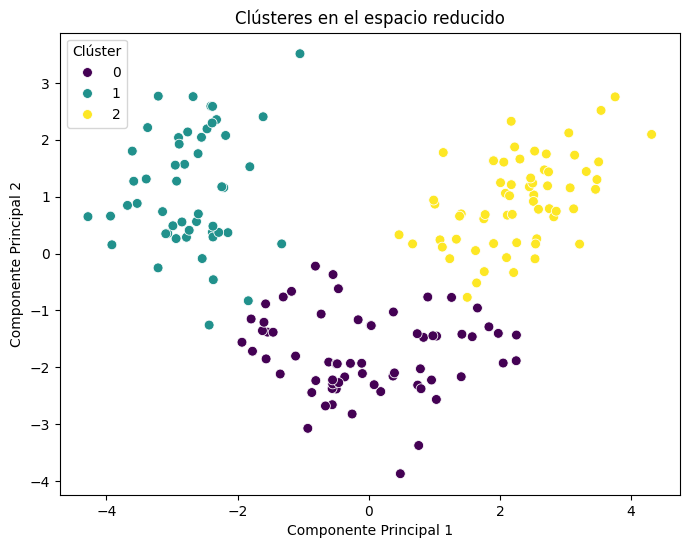

In [20]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=labels_final, palette="viridis", s=50)
plt.title("Clústeres en el espacio reducido")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.legend(title="Clúster")
plt.show()

---

### 8. Métricas de desempeño

In [21]:
# Métrica de Silueta
sil_final = silhouette_score(X_scaled, labels_final)
print("Puntaje de Silueta (k={}) : {:.3f}".format(best_k, sil_final))

# Índice de Calinski-Harabasz
ch_score = calinski_harabasz_score(X_scaled, labels_final)
print("Índice de Calinski-Harabasz (k={}) : {:.3f}".format(best_k, ch_score))

Puntaje de Silueta (k=3) : 0.285
Índice de Calinski-Harabasz (k=3) : 70.940
